连续优化、离散优化

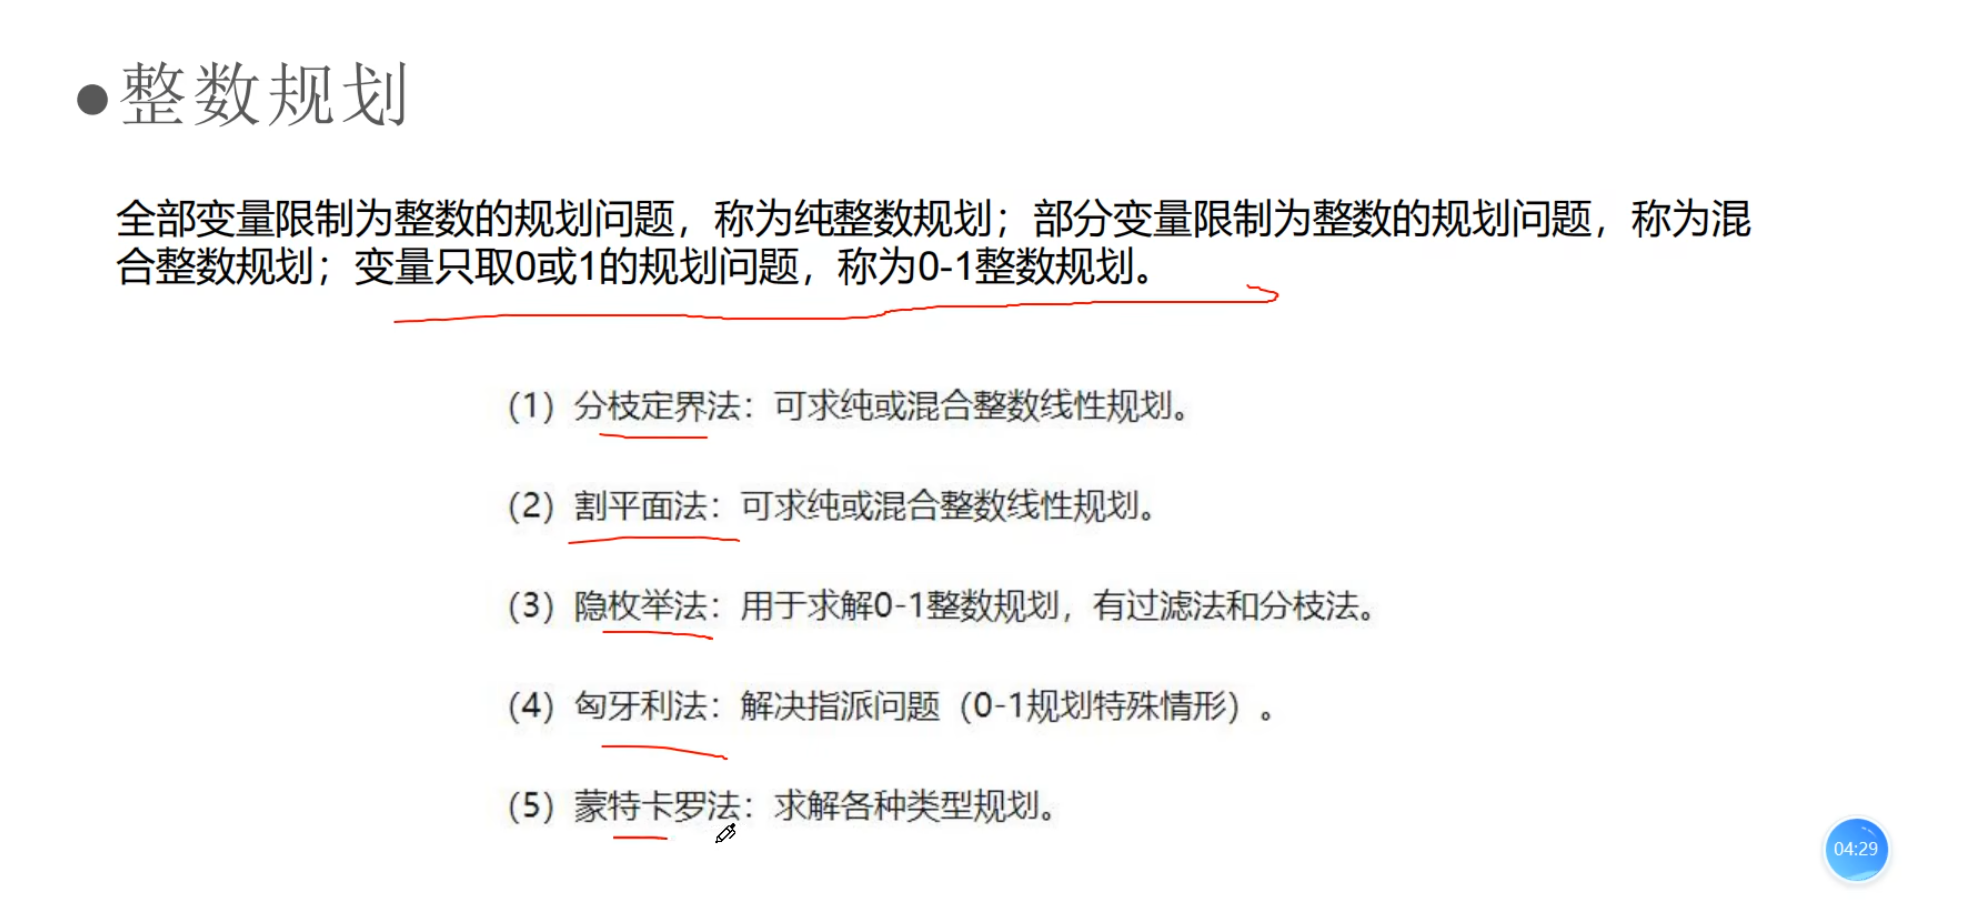

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-25 195950.png")

0-1规划就是表示有没有的问题：常见问题就是指派问题 TSP问题和VRP问题 集合覆盖问题

指派问题：假设n个人做n个任务，第i个人完成第j项任务的效率是cij，则如何是效率最高

1.匈牙利法

In [2]:
import numpy as np
from scipy.optimize import linear_sum_assignment
t = np.array([[35,29,31,42],[39,38,26,20],[34,27,28,40],[24,42,36,23]])
row_ind,col_ind = linear_sum_assignment(t)
print(row_ind,col_ind)
#row_ind 和 col_ind 表示选择的行和列索引：
#第 0 行分配到第 1 列第 1 行分配到第 3 列第 2 行分配到第 2 列第 3 行分配到第 0 列
print(t[row_ind,col_ind])
#t[row_ind, col_ind] 表示选中的元素：
print(t[row_ind,col_ind].sum())

[0 1 2 3] [1 3 2 0]
[29 20 28 24]
101


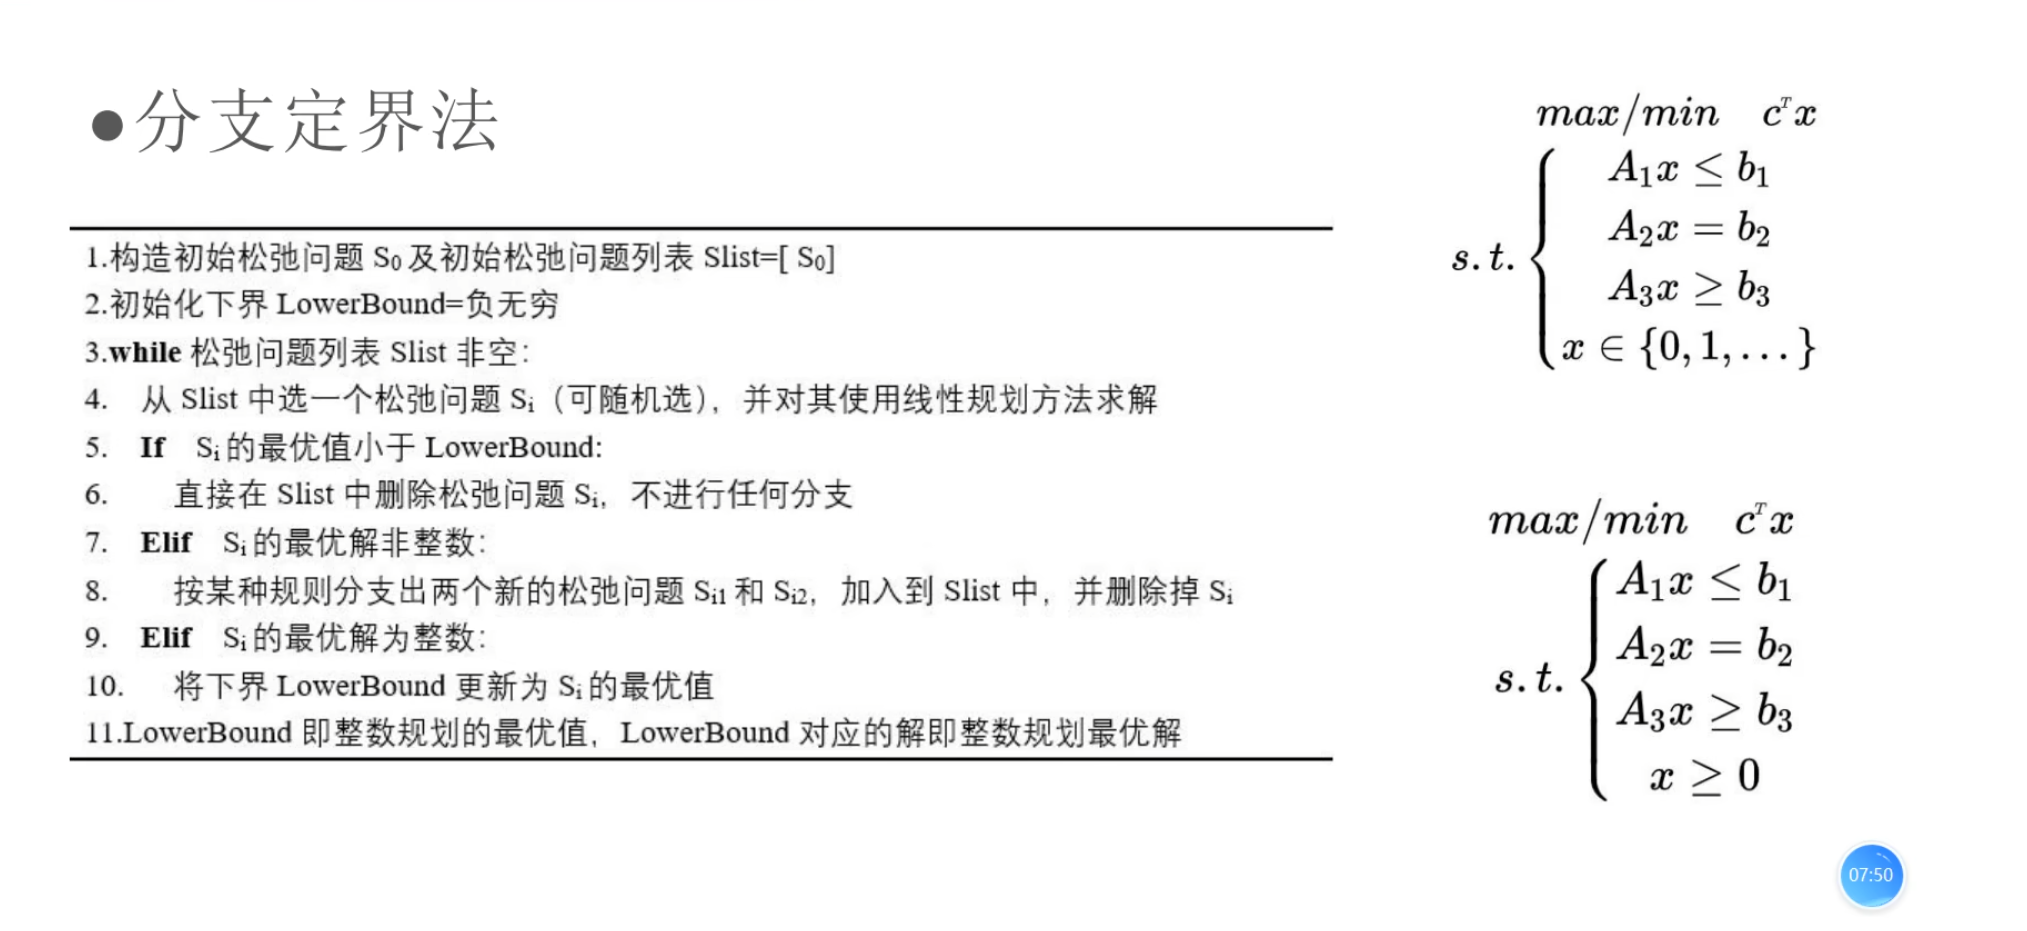

In [3]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-25 223013.png")

指派问题是一种组合优化问题，目标是将一组任务指派给一组工人，以使总的指派成本最小。分支定界法是一种有效的求解方法，适用于许多优化问题，包括指派问题。

分支定界法的基本步骤
问题表示：

设 
𝑛
n 个任务和 
𝑛
n 个工人。
构建一个 
𝑛
×
𝑛
n×n 的成本矩阵 
𝐶
C，其中 
𝐶
[
𝑖
]
[
𝑗
]
C[i][j] 表示将任务 
𝑖
i 指派给工人 
𝑗
j 的成本。
初始化：

创建一个优先队列或堆来存储节点。
将根节点（没有指派任何任务的状态）插入队列中。
分支：

从队列中取出一个节点进行扩展。
对当前未分配的任务，尝试将其指派给所有未分配的工人，生成新的节点。
限界：

计算节点的下界，即从当前状态到解的最小可能成本。
如果节点的下界大于当前已找到的最优解的成本，则剪枝（舍弃该节点）。
搜索：

不断重复分支和限界步骤，直到所有节点都被处理。
最终的最优解为成本最小的解。

In [1]:
import heapq
import numpy as np

class Node:
    def __init__(self, cost, path, assigned):
        self.cost = cost
        self.path = path
        self.assigned = assigned

    def __lt__(self, other):
        return self.cost < other.cost
#我们定义了一个 Node 类来表示树中的每个节点。每个节点包含以下信息：cost：当前节点的成本。path：指派路径，表示每个任务被分配给哪个工人。assigned：布尔列表，表示哪些工人已经被分配。
def calculate_cost(cost_matrix, path):
    cost = 0
    for i, j in enumerate(path):
        if j != -1:
            cost += cost_matrix[i][j]
    return cost
#计算当前路径的总成本
def branch_and_bound(cost_matrix):
    n = len(cost_matrix)
    # 初始化优先队列
    priority_queue = []
    # 根节点
    root = Node(cost=0, path=[-1]*n, assigned=[False]*n)
    heapq.heappush(priority_queue, root)
    best_cost = float('inf')
    best_path = None

    while priority_queue:
        node = heapq.heappop(priority_queue)

        if len(node.path) == n:
            if node.cost < best_cost:
                best_cost = node.cost
                best_path = node.path
        else:
            i = len(node.path) - sum(node.assigned)
            for j in range(n):
                if not node.assigned[j]:
                    new_path = node.path[:]
                    new_path[i] = j
                    new_assigned = node.assigned[:]
                    new_assigned[j] = True
                    new_cost = calculate_cost(cost_matrix, new_path)
                    if new_cost < best_cost:
                        heapq.heappush(priority_queue, Node(new_cost, new_path, new_assigned))

    return best_cost, best_path

# 示例成本矩阵
cost_matrix = [[35,29,31,42],[39,38,26,20],[34,27,28,40],[24,42,36,23]]

best_cost, best_path = branch_and_bound(cost_matrix)
print("最小成本: ", best_cost)
print("最优路径: ", best_path)


最小成本:  0
最优路径:  [-1, -1, -1, -1]
